Text(0.5, 1.0, 'Original image')

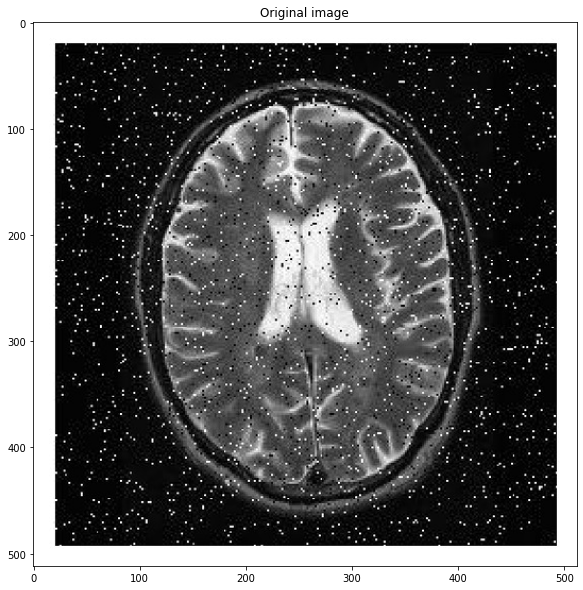

In [66]:
%matplotlib inline
from IPython.display import display, Math, Latex
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import math
import scipy.ndimage as nd
import pylab as pl
from collections import defaultdict

#url = 'https://www.researchgate.net/profile/Zhiwu-Liao/publication/44850068/figure/fig2/AS:305428874448947@1449831326678/Noisy-Lena-a-and-denoised-Lena-using-Wieners-filter-with-77-mask-b.png'
url = 'https://miro.medium.com/max/1074/1*2I9jCD3ZuQd-SUhC21ra8Q.jpeg'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
img.thumbnail((512, 512), Image.ANTIALIAS)

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")

In [67]:
def adaptive_local_noise_reduction_filter(img, var_g, s=3):
	x, y = img.shape
	# Initialize result image
	result = np.zeros_like(img)

	filter_edge = int(s/2)
  
	# Traverse through image
	for i in range(0,x):
		for j in range(0,y):
			 # Create new filter list
			 filtr = []

			 # Traverse through filter
			 for u in range(s):
				 for v in range(s):
					 # Get current position
					 cur_x = (i + u - filter_edge)
					 cur_y = (j + v - filter_edge)

					 # Stay inside image boundaries
					 if((cur_x >= 0) and (cur_y >= 0) and (cur_x < x) and (cur_y < y)):
						 # Append value to filter list
						 filtr.append(img[cur_x, cur_y])

			 # Convert filter list to numpy array
			 filtr = np.array(filtr)
			 # Get local mean from filter
			 mean_l = np.mean(filtr)
			 # Get local variance from filter
			 var_l = np.var(filtr)

			 # If local variance is smaller than global variance, set ratio to 1
			 if var_g <= var_l:
				 r = var_g/var_l
			 else:
				 r = 1
			 # Get the output value and round off to nearest integer
			 result[i, j] = img[i, j] - (r * (img[i, j] - mean_l))
	return cv2.medianBlur(img, 5)

Text(0.5, 1.0, 'Adaptive local noise reduction filter')

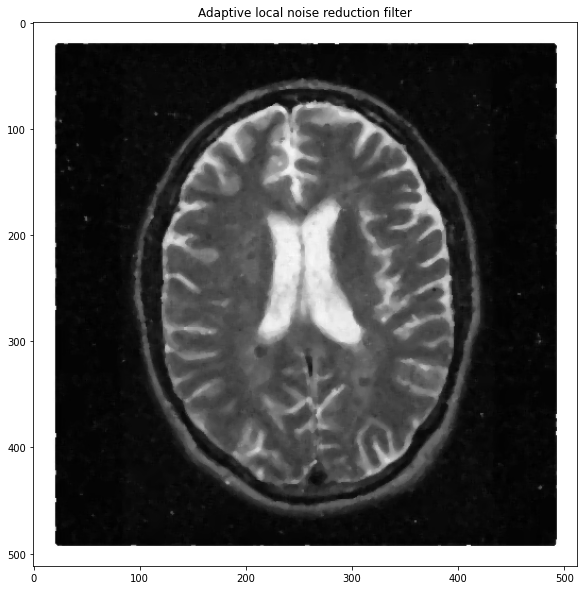

In [70]:
img = np.asarray(img)
enhance_img = adaptive_local_noise_reduction_filter(img, 0.1) 
# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(enhance_img, cmap='gray', vmin=0, vmax=255)
plt.title("Adaptive local noise reduction filter")